In [1]:
# Install the library into this environment if you haven't already
# !pip install daesim-preprocess

In [2]:
from DAESIM_preprocess.terrain_tiles import terrain_tiles

# Basic Example

In [3]:
# Example variables
lat = -34.3890427
lon=148.469499
buffer = 0.01  # Degrees in each direction (so ~2kmx2km)

In [4]:
# The main function
ds = terrain_tiles(lat, lon, buffer)

Starting terrain_tiles.py
Downloaded ./TEST_terrain_original.tif
Saved ./TEST_terrain.tif


In [5]:
# Example xarray that gets returned
ds

<xarray.Dataset> Size: 2MB
Dimensions:  (x: 466, y: 565)
Coordinates:
  * x        (x) float64 4kB 1.653e+07 1.653e+07 ... 1.653e+07 1.653e+07
  * y        (y) float64 5kB -4.08e+06 -4.08e+06 ... -4.083e+06 -4.083e+06
Data variables:
    terrain  (y, x) float64 2MB 531.0 531.0 530.0 530.0 ... 552.0 552.0 552.0

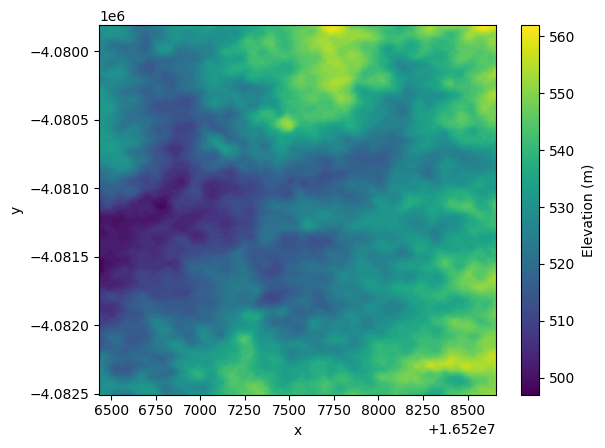

In [6]:
# Example Visualisation
ds['terrain'].plot(cbar_kwargs={'label': 'Elevation (m)'})

# More examples

In [7]:
# Retrieving a single point
ds = terrain_tiles(lat=lat, lon=lon, buffer=0)
ds

Starting terrain_tiles.py
Downloaded ./TEST_terrain_original.tif
Saved ./TEST_terrain.tif


<xarray.Dataset> Size: 18B
Dimensions:  (x: 1, y: 1)
Coordinates:
  * x        (x) float64 8B 1.653e+07
  * y        (y) float64 8B -4.081e+06
Data variables:
    terrain  (y, x) int16 2B 524

In [8]:
# Giving the files a new name
ds = terrain_tiles(lat=lat, lon=lon, buffer=buffer,
                 stub="NEW_STUB")

Starting terrain_tiles.py
Downloaded ./NEW_STUB_terrain_original.tif
Saved ./NEW_STUB_terrain.tif


In [9]:
# Saving the results in a new location
import os
if not os.path.exists('tmpdir'):
    os.mkdir('tmpdir')
if not os.path.exists('outdir'):
    os.mkdir('outdir')
ds = terrain_tiles(lat=lat, lon=lon, buffer=buffer, outdir='outdir', tmpdir='tmpdir')

Starting terrain_tiles.py
Downloaded tmpdir/TEST_terrain_original.tif
Saved outdir/TEST_terrain.tif


In [10]:
# Using a different tile level (1km pixels), along with a much larger buffer (~100km)
ds = terrain_tiles(lat=lat, lon=lon, buffer=0.5, tile_level=7)
ds

Starting terrain_tiles.py
Downloaded ./TEST_terrain_original.tif
Saved ./TEST_terrain.tif


<xarray.Dataset> Size: 325kB
Dimensions:  (x: 182, y: 221)
Coordinates:
  * x        (x) float64 1kB 1.647e+07 1.647e+07 ... 1.658e+07 1.658e+07
  * y        (y) float64 2kB -4.014e+06 -4.015e+06 ... -4.148e+06 -4.148e+06
Data variables:
    terrain  (y, x) float64 322kB 579.0 628.0 695.0 555.0 ... 526.0 510.0 529.0

In [11]:
# Skipping the nearest neighbour interpolation that attempts to fix bad values
ds = terrain_tiles(lat=lat, lon=lon, buffer=buffer, interpolate=False)
ds

Starting terrain_tiles.py
Downloaded ./TEST_terrain_original.tif


# Useful resources
- Source code: https://github.com/ChristopherBradley/DAESIM_preprocess/blob/main/src/DAESIM_preprocess/terrain_tiles.py
- Terrain Tiles AWS Bucket: https://registry.opendata.aws/terrain-tiles/
- Info about data sources: https://github.com/tilezen/joerd/blob/master/docs/data-sources.md

# References
* ArcticDEM terrain data DEM(s) were created from DigitalGlobe, Inc., imagery and
  funded under National Science Foundation awards 1043681, 1559691, and 1542736;
* Australia terrain data © Commonwealth of Australia (Geoscience Australia) 2017;
* Austria terrain data © offene Daten Österreichs – Digitales Geländemodell (DGM)
  Österreich;
* Canada terrain data contains information licensed under the Open Government
  Licence – Canada;
* Europe terrain data produced using Copernicus data and information funded by the
  European Union - EU-DEM layers;
* Global ETOPO1 terrain data U.S. National Oceanic and Atmospheric Administration
* Mexico terrain data source: INEGI, Continental relief, 2016;
* New Zealand terrain data Copyright 2011 Crown copyright (c) Land Information New
  Zealand and the New Zealand Government (All rights reserved);
* Norway terrain data © Kartverket;
* United Kingdom terrain data © Environment Agency copyright and/or database right
  2015. All rights reserved;
* United States 3DEP (formerly NED) and global GMTED2010 and SRTM terrain data
  courtesy of the U.S. Geological Survey.